<a href="https://colab.research.google.com/github/OwlMa/CS634/blob/master/Housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [488]:
import os
import tarfile
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os
import tarfile
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import io
house_train = pd.read_csv('train.csv')
house_test = pd.read_csv('test.csv')
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [489]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [490]:
house_train.info()#through this way, we could have a abstraction of the train set and check out the types of the data,more importantly,if there are some missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [491]:
house_train.describe()#shows a summary of the numerical

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [492]:
corr_matrix=house_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)#we could see the relationship between Saleprice and other features

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

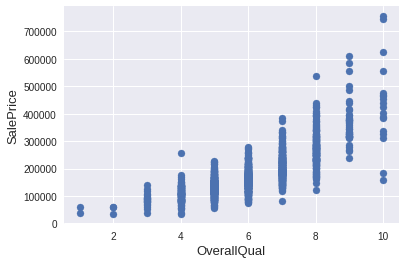

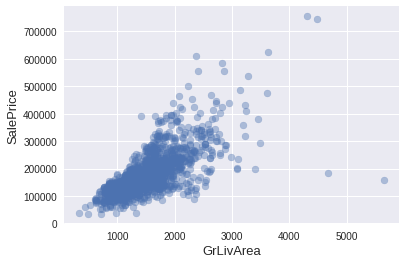

In [493]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,a=plt.subplots()
a.scatter(x=house_train['OverallQual'],y=house_train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('OverallQual',fontsize=13)
plt.show()

fig,a1=plt.subplots()
a1.scatter(x=house_train['GrLivArea'],y=house_train['SalePrice'],alpha=0.4)
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

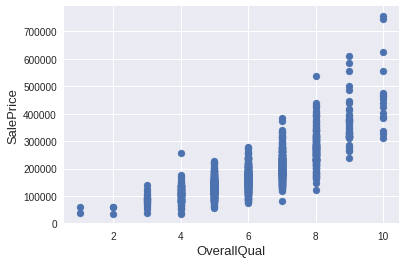

In [494]:
#Through these two graphs,we can clearly see that there are two houses not only large but also cheap with a excellent overall condition. These two houses might be in the remote and sparsely populated area.
#There it is better to delete the two oultliers.
house_train=house_train.drop(house_train[(house_train['GrLivArea']>4000)&(house_train['SalePrice']<300000)].index)

#recheck the scatter plots
fig,a=plt.subplots()
a.scatter(x=house_train['OverallQual'],y=house_train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('OverallQual',fontsize=13)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


m=180932.92 and sigma=79467.79


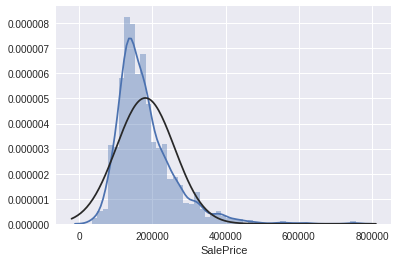

In [495]:
import numpy as np
sns.distplot(house_train["SalePrice"],fit=norm)

(m,sigma)=norm.fit(house_train["SalePrice"])
print('m={:.2f} and sigma={:.2f}'.format(m,sigma))



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


mv=12.02 and sigma=0.40


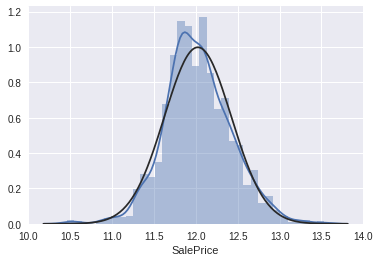

In [496]:
#We need to transform the tail-heavy distribution to normal distrbution by computing log.
house_train["SalePrice"]=np.log1p(house_train["SalePrice"])

sns.distplot(house_train["SalePrice"],fit=norm)
(mv,sigma)=norm.fit(house_train["SalePrice"])
print('mv={:.2f} and sigma={:.2f}'.format(mv,sigma))

In [497]:
#Now we need to analysis and clean up the data,so first we need to put the train set and test set together
house=pd.concat((house_train,house_test)).reset_index(drop=True)
house.head

<bound method NDFrame.head of       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0   NaN             3     1Fam       TA   
1         1262         0          0   NaN             3     1Fam       TA   
2          920       866          0   NaN             3     1Fam       TA   
3          961       756          0   NaN             3     1Fam       Gd   
4         1145      1053          0   NaN             4     1Fam       TA   
5          796       566        320   NaN             1     1Fam       TA   
6         1694         0          0   NaN             3     1Fam       TA   
7         1107       983          0   NaN             3     1Fam       TA   
8         1022       752          0   NaN             2     1Fam       TA   
9         1077         0          0   NaN             2   2fmCon       TA   
10        1040         0          0   NaN             3     1Fam       TA   
11        1182      1142          0   NaN     

In [498]:
#Firstly,we need to fill some missing data.
full=house.copy()
house.drop(["SalePrice"],axis=1,inplace=True)
house.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [499]:
saleprice=house_train['SalePrice']
saleprice


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [500]:
missing_data=house.isnull().sum()#The number of the missing data.
missing_data.sort_values(ascending=False).head(30)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
Exterior2nd        1
KitchenQual        1
Exterior1st        1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
dtype: int64

In [0]:
#We need to fix some data.
for feature in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu'):
    house[feature]=house[feature].fillna('None')
    
LotFrontage_median=house['LotFrontage'].median()
house['LotFrontage']=house['LotFrontage'].fillna(LotFrontage_median)

for feature1 in ('GarageCond','GarageType','GarageQual','GarageFinish'):
    house[feature1]=house[feature1].fillna('None')
for feature2 in ('GarageYrBlt','GarageArea','GarageCars'):
    house[feature2]=house[feature2].fillna(0)
    
for feature3 in ('BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'):
    house[feature3]=house[feature3].fillna('None')

house['MasVnrArea']=house['MasVnrArea'].fillna(0)

In [0]:
#We need to transform some text and categorial features to numerical features.
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold',"MSZoning",'Electrical','Functional','GarageFinish','GarageType','MiscFeature','SaleType','SaleCondition')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(house[c].values)) 
    house[c] = lbl.transform(list(house[c].values))
house=house.drop(['MasVnrType'],axis=1)
house=house.drop(["Utilities"],axis=1)

for Bsmt in ('BsmtHalfBath','BsmtFullBath','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1'):
    house[Bsmt]=house[Bsmt].fillna(0)

In [0]:
for text in ('MSSubClass','OverallCond','YrSold','MoSold'):
    house[text]=house[text].astype(str)

In [504]:
missing_data=house.isnull().sum()#The number of the missing data.
missing_data.sort_values(ascending=False).head(30)

YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
FullBath         0
Electrical       0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
EnclosedPorch    0
Condition2       0
YearRemodAdd     0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
dtype: int64

In [505]:
row = 1458
source_X = house.loc[0:row-1,:]
source_y = full.loc[0:row-1,'SalePrice']
pred_X = house.loc[row:,:]
pred_X.shape

(1459, 78)

In [506]:
source_X.shape

(1458, 78)

In [507]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size=0.8)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [508]:
#LinearRegression
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_X,train_y)
model.score(test_X,test_y)

0.8921780466911374

In [509]:
from sklearn import metrics
predict = model.predict(test_X)
metrics.mean_squared_error(test_y, predict)

0.016024587681836552

In [511]:
pred_y = np.expm1(model.predict(pred_X))
id = full.loc[row:,'Id']
predDf = pd.DataFrame({'Id':id, 'SalePrice':pred_y})
predDf.shape
predDf

,Id,SalePrice
1458,1461,120244.664691
1459,1462,163004.102562
1460,1463,174512.622463
1461,1464,201521.073022
1462,1465,183928.862675
1463,1466,170326.828030
1464,1467,181385.749074
1465,1468,164617.572091
1466,1469,192054.384656
1467,1470,114912.354625


In [0]:
predDf.to_csv('submission.csv',index=False)

In [0]:
files.download('submission.csv')